<a href="https://colab.research.google.com/github/ashwin-r-k/IITK_notebooks/blob/main/Collusional_Ionization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collusional Ionization

In [11]:
#Importing All the Needed Libraries
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Downloading The data File.
!wget "https://github.com/ashwin-r-k/share/raw/main/CI_ratecoefficient_Cion.xlsx"

# Importing to a data frame.
df = pd.read_excel('CI_ratecoefficient_Cion.xlsx')
print(df)

--2024-08-13 07:53:39--  https://github.com/ashwin-r-k/share/raw/main/CI_ratecoefficient_Cion.xlsx
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ashwin-r-k/share/main/CI_ratecoefficient_Cion.xlsx [following]
--2024-08-13 07:53:39--  https://raw.githubusercontent.com/ashwin-r-k/share/main/CI_ratecoefficient_Cion.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16969 (17K) [application/octet-stream]
Saving to: ‘CI_ratecoefficient_Cion.xlsx.1’

CI_ratecoefficient_ 100%[===================>]  16.57K  --.-KB/s    in 0.001s  

2024-08-13 07:53:39 (27.7 MB/s) - ‘CI_ratecoefficient_Cion.xlsx.1’ sa

In [13]:
list_T = df["T"]
list_xi0 = df["xi0"]
list_alpha1 = df["alpha1"]
list_xi1 = df["xi1"]
list_alpha2 = df["alpha2"]
list_xi2 = df["xi2"]
list_alpha3= df["alpha3"]
list_xi3 = df["xi3"]
list_alpha4= df["alpha4"]
list_xi4= df["xi4"]
list_alpha5= df["alpha5"]
list_xi5= df["xi5"]
list_alpha6= df["alpha6"]


In [14]:

ionization_fraction = []

# I am Using the Upper triangular matrix.
for i in range(len(list_T)):
    T, xi0, alpha1, xi1, alpha2, xi2, alpha3, xi3, alpha4, xi4, alpha5, xi5, alpha6 = list_T[i], list_xi0[i], list_alpha1[i], list_xi1[i], list_alpha2[i], list_xi2[i], list_alpha3[i], list_xi3[i], list_alpha4[i], list_xi4[i], list_alpha5[i], list_xi5[i], list_alpha6[i]
    U = [[xi0, -alpha1, 0, 0, 0, 0, 0],
        [0, xi1, -alpha2, 0, 0, 0, 0],
        [0, 0, xi2, -alpha3, 0, 0, 0],
         [0, 0, 0, xi3, -alpha4, 0, 0],
          [0, 0, 0, 0, xi4, -alpha5, 0],
             [0, 0, 0, 0, 0, xi5, -alpha6],
             [0, 0, 0, 0, 0, 0, 0]]
    row=[1]
    factor=1
    factor_sum=0
    for j in range(0,6):
        try:
            factor = -U[j][j] / U[j][j + 1]*factor
            row.append(factor)
            factor_sum = factor_sum + factor
        except :
            print(f"Some error row {i+1}, column {j+1}")
            continue
    x0 = 1/(1+ factor_sum)
    row = np.array(row)*x0
    ionization_fraction.append(row)

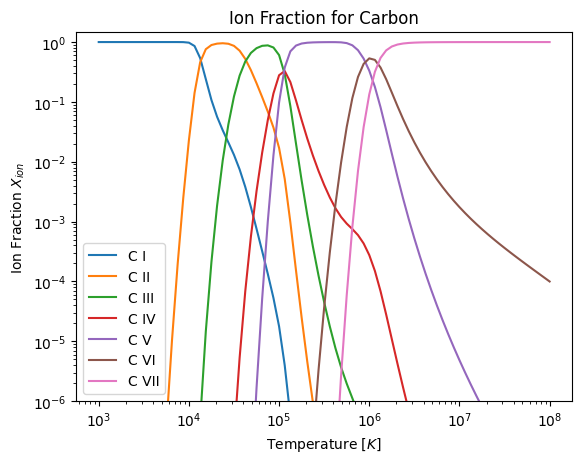

In [15]:
#Plot
plt.plot(list_T, np.array(ionization_fraction)[:, 0], label="C I")
plt.plot(list_T, np.array(ionization_fraction)[:, 1], label="C II")
plt.plot(list_T[:], np.array(ionization_fraction)[:, 2], label="C III")
plt.plot(list_T[:], np.array(ionization_fraction)[:, 3], label="C IV")
plt.plot(list_T[:], np.array(ionization_fraction)[:, 4], label="C V")
plt.plot(list_T[:], np.array(ionization_fraction)[:, 5], label="C VI")
plt.plot(list_T[:], np.array(ionization_fraction)[:, 6], label="C VII")


plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-6,1.5)
plt.title("Ion Fraction for Carbon")
plt.xlabel(r"Temperature $[K]$")
plt.ylabel(r"Ion Fraction $X_{ion}$ ")
plt.legend()
plt.show()


Few sample temp :

T
1000
4217
10000
100000
1000000
10000000
100000000

In [16]:
T = 100000
df_single = df.loc[df.iloc[:, 0] == T]
df_single = df_single.iloc[0]
print(df_single)


T         1.000000e+05
xi0       1.313100e-08
alpha1    1.367800e-11
xi1       1.210800e-09
alpha2    3.398700e-11
xi2       1.968400e-11
alpha3    4.273200e-11
xi3       5.173800e-13
alpha4    1.474200e-12
xi4       9.390600e-31
alpha5    3.491600e-12
xi5       7.044900e-36
alpha6    6.114900e-12
Name: 32, dtype: float64


In [17]:
list_T = df_single["T"]
list_xi0 = df_single["xi0"]
list_alpha1 = df_single["alpha1"]
list_xi1 = df_single["xi1"]
list_alpha2 = df_single["alpha2"]
list_xi2 = df_single["xi2"]
list_alpha3= df_single["alpha3"]
list_xi3 = df_single["xi3"]
list_alpha4= df_single["alpha4"]
list_xi4= df_single["xi4"]
list_alpha5= df_single["alpha5"]
list_xi5= df_single["xi5"]
list_alpha6= df_single["alpha6"]


ionization_fraction = []
T, xi0, alpha1, xi1, alpha2, xi2, alpha3, xi3, alpha4, xi4, alpha5, xi5, alpha6 = list_T, list_xi0, list_alpha1, list_xi1, list_alpha2, list_xi2, list_alpha3, list_xi3, list_alpha4, list_xi4, list_alpha5, list_xi5, list_alpha6
U = [[xi0, -alpha1, 0, 0, 0, 0, 0],
    [0, xi1, -alpha2, 0, 0, 0, 0],
    [0, 0, xi2, -alpha3, 0, 0, 0],
        [0, 0, 0, xi3, -alpha4, 0, 0],
        [0, 0, 0, 0, xi4, -alpha5, 0],
            [0, 0, 0, 0, 0, xi5, -alpha6],
            [0, 0, 0, 0, 0, 0, 0]]
row=[1]
factor=1
factor_sum=0
for j in range(0,6):
    try:
        factor = -U[j][j] / U[j][j + 1]*factor
        row.append(factor)
        factor_sum = factor_sum + factor
    except :
        print(f"Some error row {i+1}, column {j+1}")
        continue
x0 = 1/(1+ factor_sum)
row = [x * x0 for x in row]
#row = np.array(row)*x0
print(row)


[1.7716405052191425e-05, 0.017007904279889283, 0.6059131580336583, 0.27910686611285523, 0.09795435516854499, 2.63446605466187e-20, 3.035135473758755e-44]
